# Experiment: Map of global Freshwater Withdrawal

In [6]:
import numpy as np
from matplotlib.colors import ListedColormap
import sys
import os

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

Import Data

In [7]:
# create custom color map

RGB1 = [0, 0, 150]  # dark blue
RGB2 = [150, 0, 0]  # dark red

N = 256  #number of discrete levels
vals = np.ones((N, 4))

vals[:, 0] = np.linspace(RGB1[0] / 256, RGB2[0] / 256, N)
vals[:, 1] = np.linspace(RGB1[1] / 256, RGB2[1] / 256, N)
vals[:, 2] = np.linspace(RGB1[2] / 256, RGB2[2] / 256, N)

# finally, create the required colormap that ranges from
# -- dark blue to pale green
custom_cmap = ListedColormap(vals)

In [8]:
from src.aquastat_utils import get_aquastat

df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/home/marten/Uni/Semester_2/Data_Literacy/Datascience_Project/team-acqua/src/../dat/fao_aquastat.csv already exists.
Getting AQUASTAT dataframe from fao_aquastat.csv ...
/home/marten/Uni/Semester_2/Data_Literacy/Datascience_Project/team-acqua/src/../dat/fao_aquastat.csv already exists.


<Figure size 2000x8000 with 0 Axes>

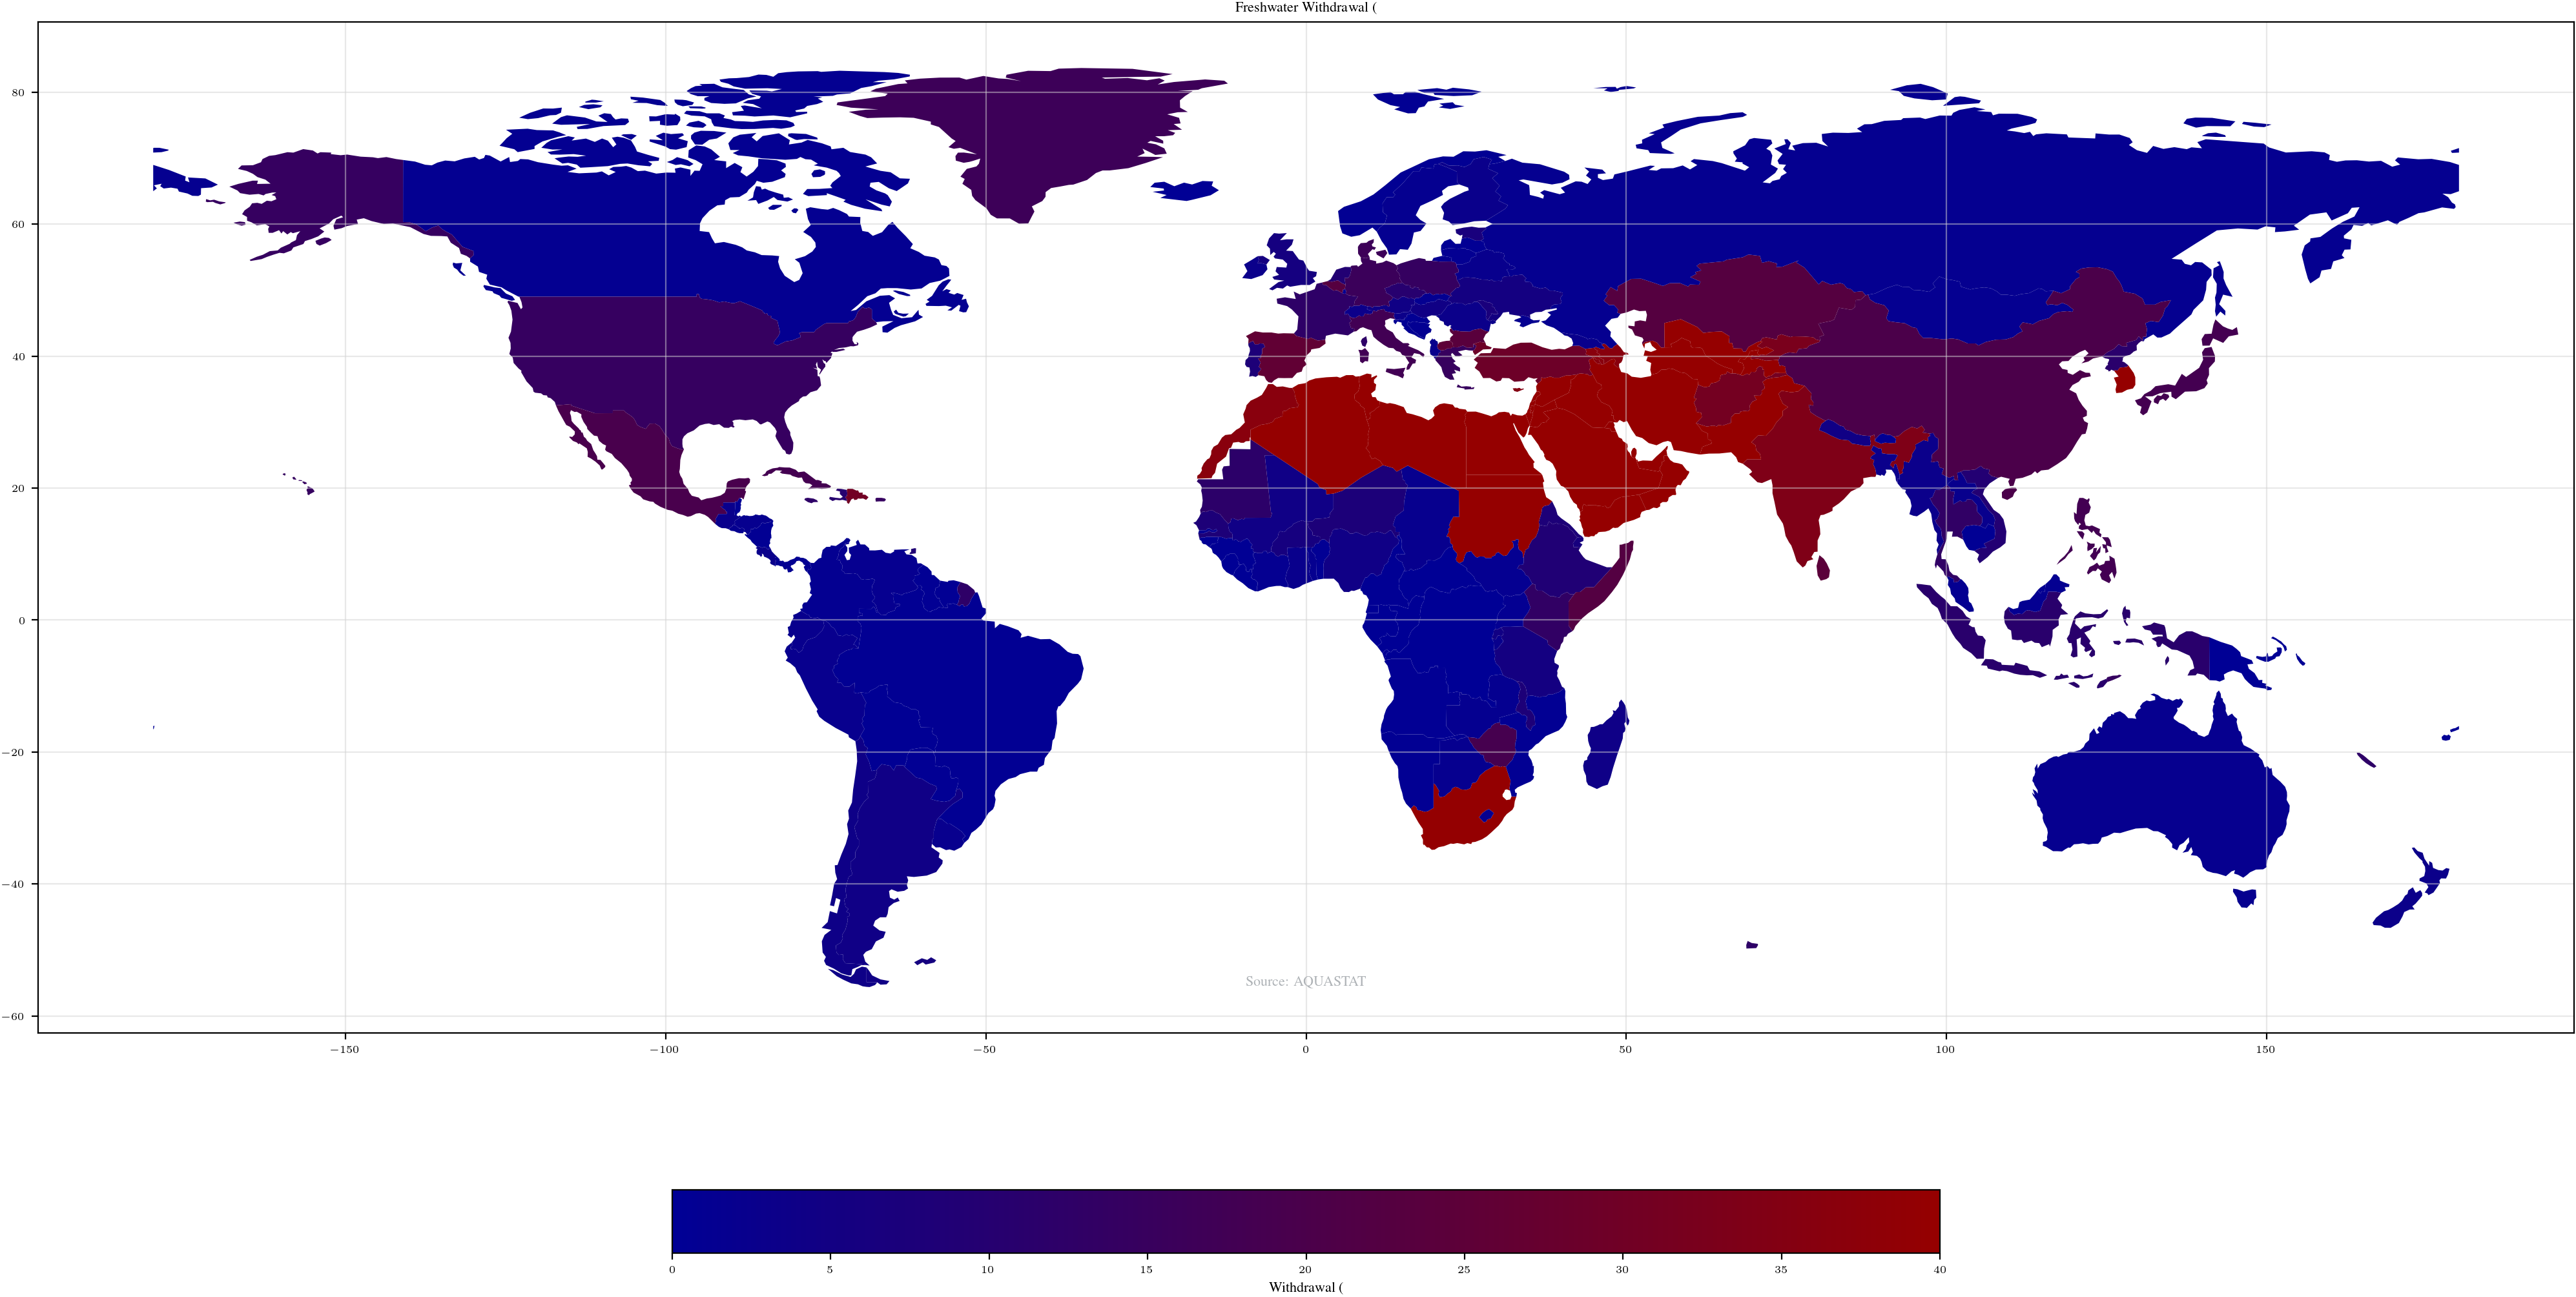

In [9]:
'''Plot a map vizualizing the Freshwater withdrawal (%)'''
from src.aquastat_utils import plot_world

year = 2020
variables = ["MDG 7.5. Freshwater withdrawal as % of total renewable water resources"]
title = 'Freshwater Withdrawal (%)'
world = plot_world(df, year=year, variables=variables, title=title, cmap=custom_cmap)
world.show()